In [52]:
# Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Path similarity 
- Using the snakemake pipeline from ../scripts/
- Core if gfastats ps 

In [53]:
# Data is here
f = "../results/ps/chr1.gfastats.ps.txt"
fpath = "/".join(f.split("/")[:-1])

In [54]:
# Read in file
df = pd.read_csv(f, sep = "\t")
df.head()

,Accession,Node:0,Node:1,Node:2,Node:3,Node:4,Node:5,Node:6,Node:7,Node:8,...,Seq:18,Seq:19,Seq:20,Seq:21,Seq:22,Seq:23,Seq:24,Seq:25,Seq:26,Seq:27
0,10002#1#Chr1,20273,14194,13630,12846,13968,15749,16018,17545,19870,...,274468,362909,298124,346639,400184,498530,693966,1013763,1630570,20313293
1,10015#1#Chr1,17814,13706,17970,16049,18435,16005,19221,18937,16679,...,231596,246695,295887,317557,369470,476243,659342,1006688,1633711,20313293
2,10024#1#Chr1,40829,31286,19198,18221,18575,17629,19770,20257,20742,...,210022,219410,213864,258486,318531,405645,576233,899400,1515298,20313293
3,1741#1#Chr1,20405,16962,15625,18823,17664,16437,16575,19296,20865,...,258486,331012,289978,343798,393002,491930,699769,1004626,1632901,20313293
4,22001f#1#Chr1,10631,27133,20176,18629,20060,18993,19317,20210,16329,...,236026,239065,302080,290667,365754,470434,683890,994297,1645105,20313293


In [55]:
# Sequence starts here
seq_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Seq")][0]
seq_index

29

In [56]:
# Data starts here
start_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Node")][0]+1
start_index

2

In [57]:
dfs = []
chrom = [1,2,3,4,5]
for x in chrom: 
    ftemp = fpath + "/chr" + str(x) + ".gfastats.ps.txt"
    dftemp = pd.read_csv(ftemp, sep = "\t")
    seq_soft = dftemp.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
    seq_core = dftemp.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
    seq_priv = dftemp.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)
    df2t = pd.DataFrame([seq_core, seq_soft, seq_priv]).T
    df2t
    df2t.columns = ["Core", "Soft", "Private"]
    df2t.index = [x.split("#")[0] for x in df["Accession"]]
    dfs.append(df2t)

In [58]:
merged_df = pd.concat(dfs, axis=0, ignore_index=False)
merged_df_sum = merged_df.groupby(merged_df.index, axis=0).sum()

merged_df_sum

,Core,Soft,Private
10002,77123517,38458208,2510906
10015,77123517,38754030,1387773
10024,77123517,36873473,2921751
1741,77123517,38946162,1612328
22001f,77123517,38905463,1757614
22002,77123517,38234990,1557830
22003,77123517,36523107,3868457
22004,77123517,38380911,3396823
22005,77123517,39700740,1837672
22006,77123517,38747829,1181059


In [59]:
merged_df_sum_div = merged_df_sum/1000000

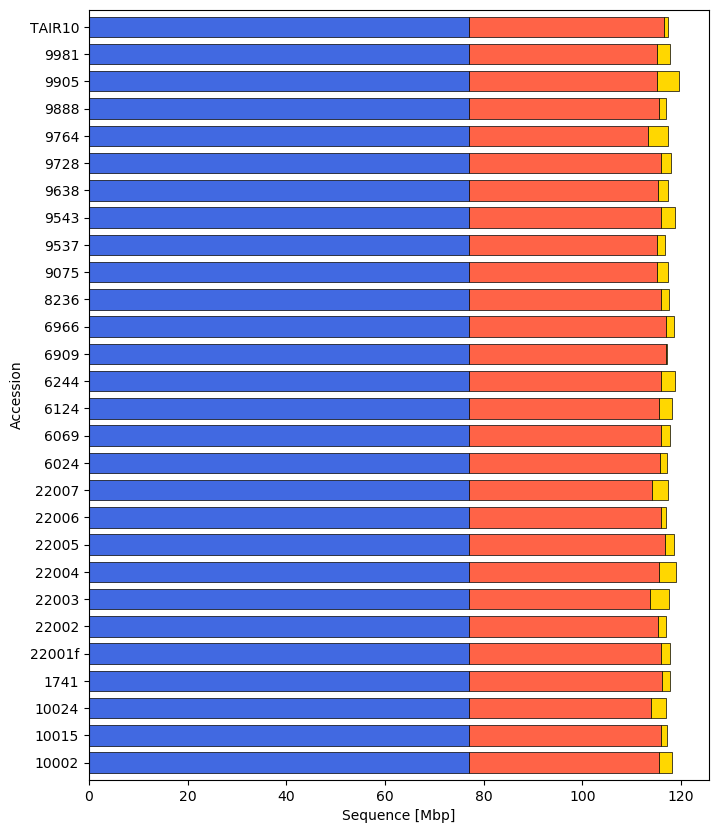

In [60]:
merged_df_sum_div.plot(kind = "barh", stacked = True, figsize = (8,10), width = 0.75, legend = False,
                       edgecolor = "black",
                      linewidth = 0.5, 
                      color = ["royalblue", "tomato", "gold"])
plt.xlabel("Sequence [Mbp]")
plt.ylabel("Accession")
plt.savefig("plots/ps/similarity_path.1000.png", dpi = 1000)
plt.savefig("plots/ps/similarity_path.400.png", dpi = 400)
plt.savefig("plots/ps/similarity_path.pdf")


In [61]:
# Write to file
merged_df_sum.to_csv("data_created/ps/ps.txt", sep = "\t")